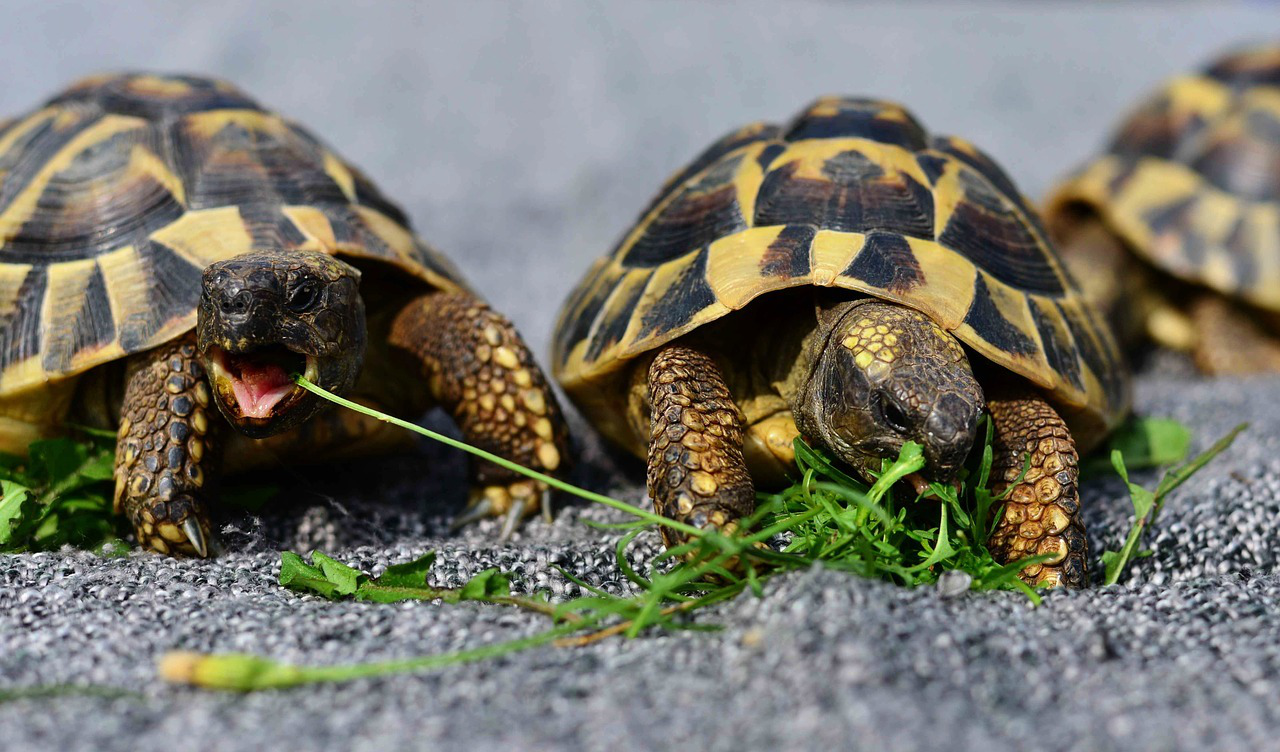

C:\Users\sravi\Desktop\toto.jpg - Dimensions: (1280, 752)


In [9]:
from PIL import Image
from IPython.display import display

# List of image filenames with .jpg format
image_filenames = [r'C:\Users\sravi\Desktop\toto.jpg']

# Loop through the list of filenames and display each image and its dimensions
for filename in image_filenames:
    try:
        img = Image.open(filename)
        display(img)
        print(f"{filename} - Dimensions: {img.size}")  # img.size returns (width, height)
    except FileNotFoundError:
        print(f"File {filename} not found.")




In [11]:
#Display minimum and maximum pixcel values

from PIL import Image
import numpy as np

# Specify the path to the image
image_path = r'C:\Users\sravi\Desktop\toto.jpg'  # Replace with your image filename

try:
    img = Image.open(image_path)

    # Convert the image to grayscale (optional, for single-channel analysis)
    gray_img = img.convert('L')

    # Convert the image to a NumPy array
    img_array = np.array(gray_img)

    # Find the maximum and minimum pixel values
    max_pixel = img_array.max()
    min_pixel = img_array.min()

    print(f"Maximum pixel value: {max_pixel}")
    print(f"Minimum pixel value: {min_pixel}")

except FileNotFoundError:
    print(f"File {image_path} not found.")


Maximum pixel value: 255
Minimum pixel value: 0


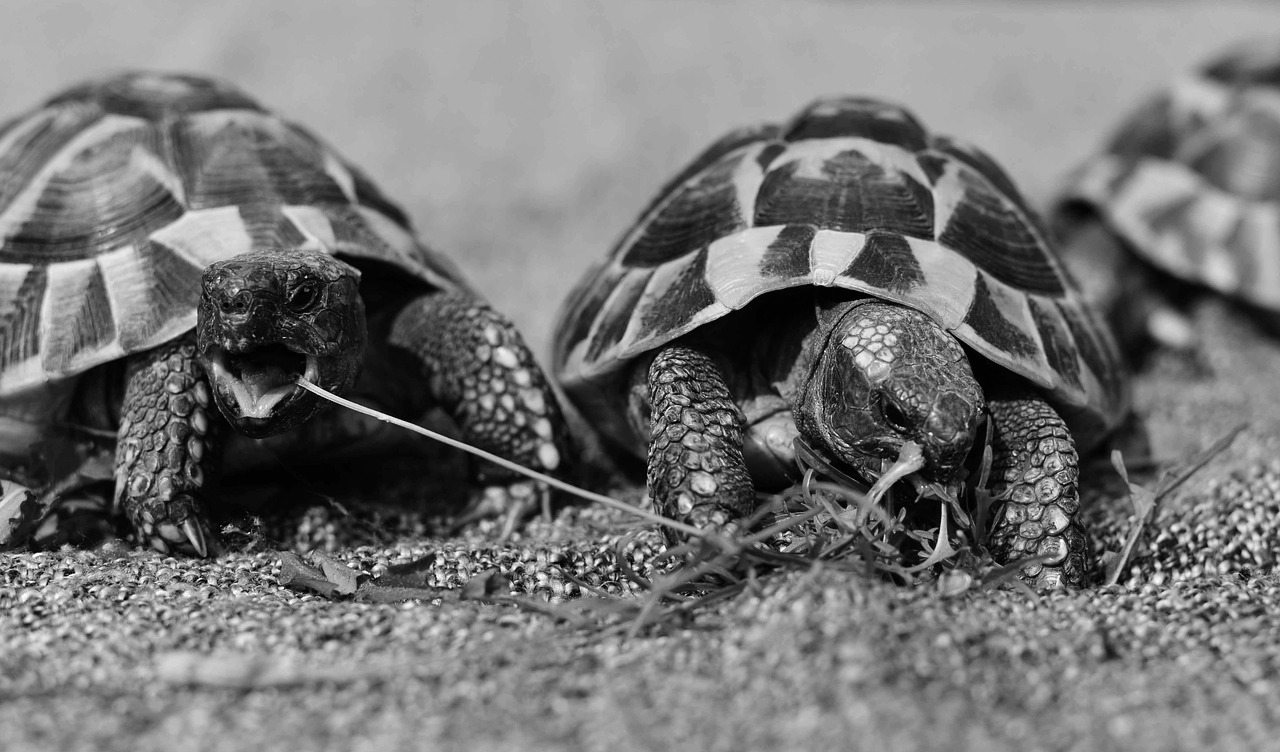

In [13]:
#convert each image into grayscale
from PIL import Image
from IPython.display import display

# List of image filenames with full paths
image_filenames = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with your actual image file paths
    # Add other images here as needed, using their full paths
]

# Loop through the list of filenames and convert each image to grayscale for display
for filename in image_filenames:
    try:
        img = Image.open(filename)
        gray_img = img.convert('L')  # Convert to grayscale

        # Display the grayscale image
        display(gray_img)
        
    except FileNotFoundError:
        print(f"File {filename} not found.")


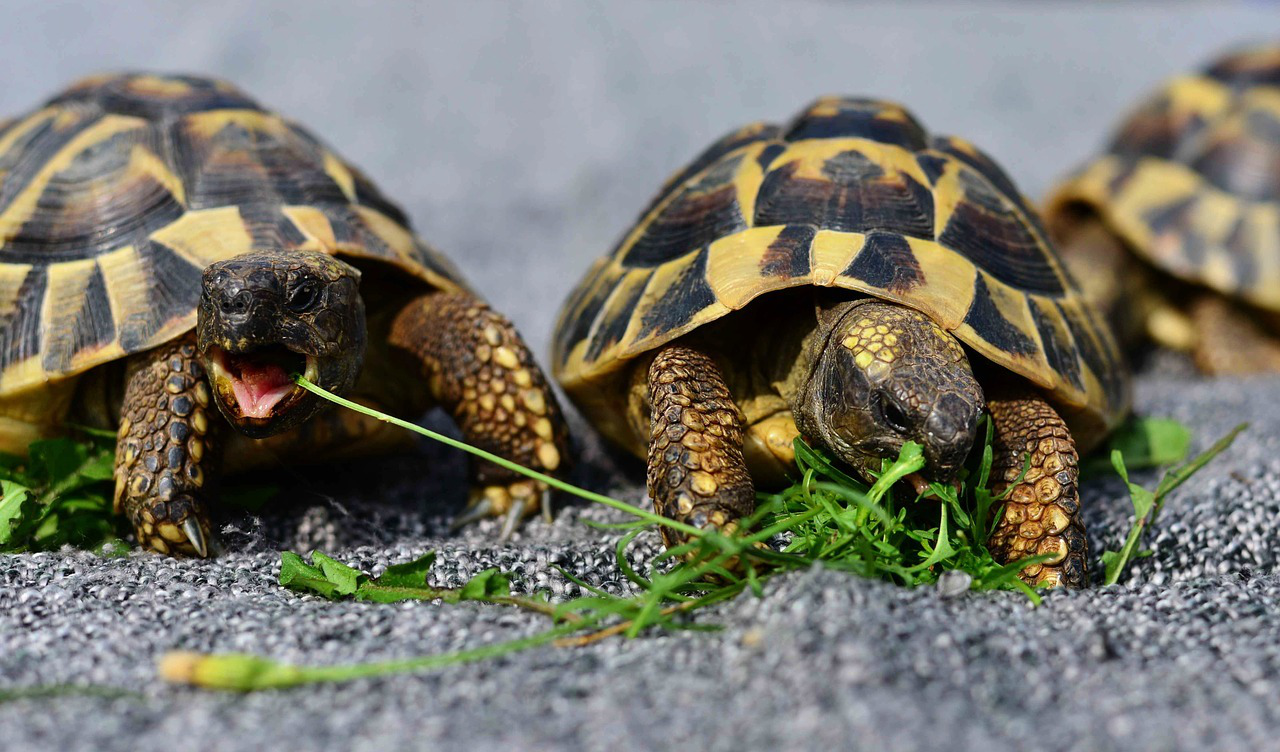

In [15]:
#convert all the images' dimensions to the dimension of c1 image

from PIL import Image
from IPython.display import display

# List of image filenames with full paths
image_filenames = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with your actual image file paths
    # Add other images here as needed
]

# Open the first image to get its dimensions
try:
    first_image = Image.open(image_filenames[0])
    first_dimensions = first_image.size  # (width, height)

    # Loop through the list of filenames, resize each to the first image's dimensions
    for filename in image_filenames:
        try:
            img = Image.open(filename)

            # Resize the image to match the first image's dimensions
            resized_img = img.resize(first_dimensions)

            # Display the resized image
            display(resized_img)
            
        except FileNotFoundError:
            print(f"File {filename} not found.")
except FileNotFoundError:
    print(f"File {image_filenames[0]} not found.")


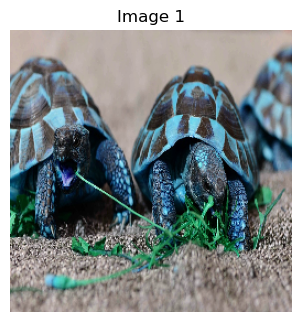

In [17]:
#Image scaling and normalization

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load, scale, and normalize images
def process_images(image_paths):
    processed_images = []
    
    for path in image_paths:
        # Load the image
        image = cv2.imread(path)
        
        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image at {path}")
            continue
        
        # Resize the image to a fixed size (e.g., 256x256) for consistency
        scaled_image = cv2.resize(image, (256, 256))
        
        # Normalize the image to the range [0, 1]
        normalized_image = scaled_image / 255.0
        
        # Append the processed image to the list
        processed_images.append(normalized_image)
    
    return processed_images

# Define the paths of the images with full paths
image_paths = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with your actual image file paths
    # Add other images here with their full paths
]

# Process the images
processed_images = process_images(image_paths)

# Display the processed images
plt.figure(figsize=(15, 10))
for idx, img in enumerate(processed_images):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f'Image {idx + 1}')
plt.tight_layout()
plt.show()


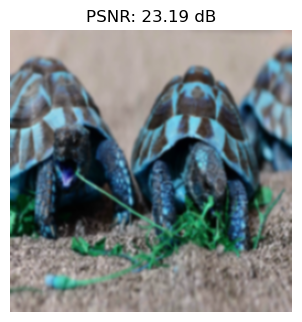

In [21]:
#Apply guassian filter to images and calculate PSNR for all

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load, scale, normalize, and apply filters to images
def process_images(image_paths):
    processed_images = []
    psnr_values = []
    
    for path in image_paths:
        # Load the image
        image = cv2.imread(path)
        
        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image at {path}")
            continue
        
        # Resize the image to a fixed size (e.g., 256x256) for consistency
        scaled_image = cv2.resize(image, (256, 256))
        
        # Normalize the image to the range [0, 1]
        normalized_image = scaled_image / 255.0
        
        # Apply a Gaussian filter to the image
        filtered_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)
        
        # Calculate PSNR between the original and filtered images
        psnr_value = cv2.PSNR(scaled_image, filtered_image)
        psnr_values.append(psnr_value)
        
        # Append the filtered image to the list (normalized as well)
        processed_images.append(filtered_image / 255.0)
    
    return processed_images, psnr_values

# Define the paths of the images with full paths
image_paths = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with your actual image file paths
    # Add other images here with their full paths
]

# Process the images
processed_images, psnr_values = process_images(image_paths)

# Display the processed images and their PSNR values
plt.figure(figsize=(15, 10))
for idx, (img, psnr) in enumerate(zip(processed_images, psnr_values)):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f'PSNR: {psnr:.2f} dB')  # Display PSNR value
plt.tight_layout()
plt.show()


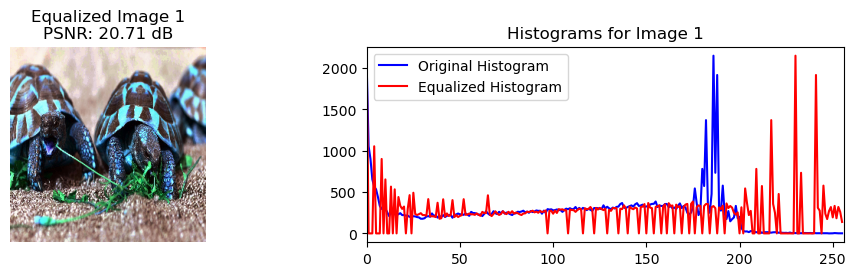

In [23]:
#Histogram equivalization

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load, scale, normalize, apply histogram equalization, and generate histograms
def process_images(image_paths):
    processed_images = []
    psnr_values = []
    histograms = []
    
    for path in image_paths:
        # Load the image
        image = cv2.imread(path)
        
        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image at {path}")
            continue
        
        # Resize the image to a fixed size (e.g., 256x256) for consistency
        scaled_image = cv2.resize(image, (256, 256))
        
        # Normalize the image to the range [0, 1]
        normalized_image = scaled_image / 255.0
        
        # Calculate the histogram of the original image
        hist_orig = cv2.calcHist([scaled_image], [0], None, [256], [0, 256])
        
        # Apply histogram equalization (for grayscale images)
        if len(scaled_image.shape) == 2:  # Grayscale image
            equalized_image = cv2.equalizeHist(scaled_image)
        else:  # Color image, apply equalization to each channel
            channels = cv2.split(scaled_image)
            equalized_channels = [cv2.equalizeHist(channel) for channel in channels]
            equalized_image = cv2.merge(equalized_channels)
        
        # Calculate the histogram of the equalized image
        hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
        
        # Calculate PSNR between the original and equalized images
        psnr_value = cv2.PSNR(scaled_image, equalized_image)
        psnr_values.append(psnr_value)
        
        # Append the equalized image to the list
        processed_images.append(equalized_image / 255.0)  # Normalize the equalized image as well
        histograms.append((hist_orig, hist_eq))  # Store the histograms
    
    return processed_images, psnr_values, histograms

# Define the paths of the images with full paths
image_paths = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with your actual image file paths
    # Add other images here with their full paths
]

# Process the images
processed_images, psnr_values, histograms = process_images(image_paths)

# Display the processed images and their PSNR values along with histograms
plt.figure(figsize=(20, 12))

for idx, (img, psnr, (hist_orig, hist_eq)) in enumerate(zip(processed_images, psnr_values, histograms)):
    # Display the equalized image
    plt.subplot(5, 4, idx * 2 + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f'Equalized Image {idx + 1}\nPSNR: {psnr:.2f} dB')  # Display PSNR value
    
    # Display the histogram of the original image
    plt.subplot(5, 4, idx * 2 + 2)
    plt.plot(hist_orig, color='blue', label='Original Histogram')
    plt.plot(hist_eq, color='red', label='Equalized Histogram')
    plt.title(f'Histograms for Image {idx + 1}')
    plt.xlim([0, 256])
    plt.legend()

plt.tight_layout()
plt.show()


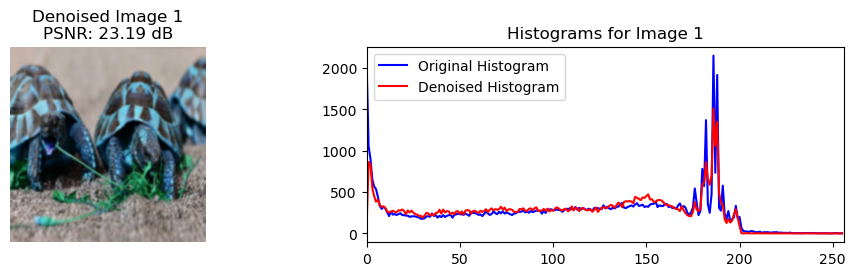

In [27]:
#Denoising of images

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load, scale, normalize, apply denoising, and generate histograms
def process_images(image_paths):
    processed_images = []
    psnr_values = []
    histograms = []
    
    for path in image_paths:
        # Load the image
        image = cv2.imread(path)
        
        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image at {path}")
            continue
        
        # Resize the image to a fixed size (e.g., 256x256) for consistency
        scaled_image = cv2.resize(image, (256, 256))
        
        # Normalize the image to the range [0, 1]
        normalized_image = scaled_image / 255.0
        
        # Calculate the histogram of the original image
        hist_orig = cv2.calcHist([scaled_image], [0], None, [256], [0, 256])
        
        # Apply Gaussian denoising (using Gaussian blur here)
        denoised_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)
        
        # Calculate the histogram of the denoised image
        hist_denoised = cv2.calcHist([denoised_image], [0], None, [256], [0, 256])
        
        # Calculate PSNR between the original and denoised images
        psnr_value = cv2.PSNR(scaled_image, denoised_image)
        psnr_values.append(psnr_value)
        
        # Append the denoised image to the list (normalize it)
        processed_images.append(denoised_image / 255.0)
        
        # Store the histograms
        histograms.append((hist_orig, hist_denoised))
    
    return processed_images, psnr_values, histograms

# Define the paths of the images with appropriate formats
image_paths = [
    r'C:\Users\sravi\Desktop\toto.jpg',  # Replace with the correct image paths
    # Add more image paths as necessary
]

# Process the images
processed_images, psnr_values, histograms = process_images(image_paths)

# Display the processed images and their PSNR values along with histograms
plt.figure(figsize=(20, 12))

for idx, (img, psnr, (hist_orig, hist_denoised)) in enumerate(zip(processed_images, psnr_values, histograms)):
    # Display the denoised image
    plt.subplot(5, 4, idx * 2 + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f'Denoised Image {idx + 1}\nPSNR: {psnr:.2f} dB')  # Display PSNR value
    
    # Display the histogram of the original and denoised images
    plt.subplot(5, 4, idx * 2 + 2)
    plt.plot(hist_orig, color='blue', label='Original Histogram')
    plt.plot(hist_denoised, color='red', label='Denoised Histogram')
    plt.title(f'Histograms for Image {idx + 1}')
    plt.xlim([0, 256])
    plt.legend()

plt.tight_layout()
plt.show()
